1. Descripción de la arquitectura apoyándose en el artículo original.

In [99]:
# Importar las librerías necesarias
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [100]:
# Definir la ruta a las imágenes
folder_path = "./Imagenes_para_exposiciones_Grupo_2"
labels = []
imagenes_list = []

for image_name in os.listdir(folder_path):
    img = load_img(os.path.join(folder_path, image_name), target_size=(224, 224))
    label = image_name.split('_')[0]
    labels.append(label)
    imagenes_list.append(img_to_array(img))

In [101]:
# Convertir palabras a números
def palabras_a_numeros(lista_palabras):
    sorted_unique = sorted(set(lista_palabras))
    palabra_numero = {palabra: i + 1 for i, palabra in enumerate(sorted_unique)}
    return [palabra_numero[palabra] for palabra in lista_palabras]

2. Implementación (incluyendo argumentos para iniciar el modelo con Keras)

3. Aplicación del modelo en el conjunto de imágenes asignadas al grupo.
Discutir los resultados mostrando las clases presentes en sus datos.

# MobilNet (detección de imagen)

In [90]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt

In [91]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available: ', len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [105]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [106]:
def prepare_image(file):
    img_path = 'Imagenes_para_exposiciones_Grupo_2/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

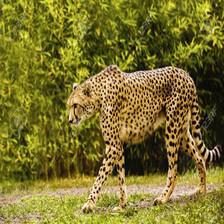

In [107]:
from IPython.display import Image
Image(filename='Imagenes_para_exposiciones_Grupo_2/acinonyx-jubatus_96_d0bb6474.jpg', width=300, height=200)

In [113]:
preprocessed_image = prepare_image('acinonyx-jubatus_96_d0bb6474.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results[0][0]

1/1 [==============================] - 0s 84ms/step


('n02130308', 'cheetah', 0.9307411)

In [114]:
results

[[('n02130308', 'cheetah', 0.9307411),
  ('n02128385', 'leopard', 0.0678155),
  ('n02128925', 'jaguar', 0.0012812424),
  ('n02117135', 'hyena', 8.4955806e-05),
  ('n02128757', 'snow_leopard', 4.01092e-05)]]

In [96]:
preprocessed_image = prepare_image('agalychnis-callidryas_3_7219e9fc.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 23ms/step


[[('n01644373', 'tree_frog', 0.8476422),
  ('n01644900', 'tailed_frog', 0.07810823),
  ('n03825788', 'nipple', 0.042633858),
  ('n03424325', 'gasmask', 0.0059825405),
  ('n04355933', 'sunglass', 0.005673638)]]

In [111]:
preprocessed_image = prepare_image('danaus-plexippus_69_112eb9bd.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results[0][0]

1/1 [==============================] - 0s 79ms/step


('n02279972', 'monarch', 0.9994555)

- Jose : Agregar parte teorica y formato informe.
- Benja : Mapear predictions con el nombre de los archivos para validar.
    - 1 Una forma seria buscar los nombres cientificos y ver si coindicen con los nombres que dan.
    - 2 O la otra seria simplemente ver las probabilidades que son aceptables definir un 80% de exactitud como aceptable y contamos los casos que cumplen esto.